Number of Lines Detected:  220


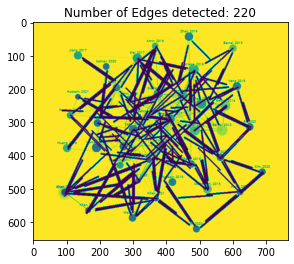

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


# Reading the input image
img = cv2.imread('graph.png')
 
# convert to grayscale
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


imager=cv2.imread('graph.png',0)
size1=2
gauss_kernel = np.ones((size1,size1),np.float32)/(size1*size1)
imager = cv2.filter2D(imager,-1,gauss_kernel)

size2=2
eros_kernel = np.ones((size2,size2), np.uint8)
img_erosion = cv2.erode(imager, eros_kernel, iterations=2)
 
#-------------------------------------------------------
imager=img_erosion
for i in range(imager.shape[0]):
    for j in range(imager.shape[1]):
        if imager[i,j]<=60:
            imager[i,j]=255
size3=2
fin_gauss_kernel = np.ones((size3,size3),np.float32)/(size3*size3)
imager = cv2.filter2D(imager,-1,fin_gauss_kernel)


# perform edge detection
edges = cv2.Canny(imager, 10, 10)

# detect lines in the image using hough lines technique
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 60, np.array([]), 50, 5)

# iterate over the output lines and draw them
num_lines=0
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(grayscale, (x1, y1), (x2, y2), (20, 220, 20), 3)
        num_lines+=1
        
print("Number of Lines Detected: ", num_lines)
fig1 = plt.gcf()
plt.title("Number of Edges detected: "+ str(num_lines))
plt.imshow(grayscale)
plt.show()
fig1.savefig('graph_edges_detected.jpg',dpi=1000, bbox_inches='tight')